In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 32.8 MB/s 
     |████████████████████████████████| 463 kB 74.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220

In [3]:
!ls /content/gdrive/MyDrive/GAN/Utility_GAN/

cifar10.py  pix2pix.py	__pycache__


In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/GAN/Utility_GAN/')

In [5]:
from pix2pix import *
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

In [6]:
def load_images(path, size=(256, 512)):
  source_images, target_images=list(), list()
  for filename in os.listdir(path):
    x=load_img(path+filename, target_size=size)
    x=img_to_array(x)
    src_img, tar_img=x[:, :256], x[:, 256:]
    source_images.append(src_img)
    target_images.append(tar_img)

  return [np.asarray(source_images), np.asarray(target_images)]

In [ ]:
[source_imgs, target_imags]=load_images(path='/content/gdrive/MyDrive/GAN/Pix2Pix/Data/maps/maps/train/')
print('Loaded: ', source_imgs.shape, target_imags.shape)

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


In [7]:
[source_imgs, target_imags]=load_images(path='/content/gdrive/MyDrive/GAN/Pix2Pix/Data/maps/maps/val/')
print('Loaded: ', source_imgs.shape, target_imags.shape)

Loaded:  (1098, 256, 256, 3) (1098, 256, 256, 3)


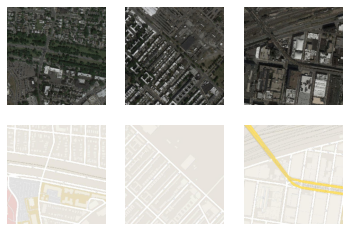

In [ ]:
n_samples=3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1+i)
	plt.axis('off')
	plt.imshow(source_imgs[i].astype('uint8'))

for i in range(n_samples):
	plt.subplot(2, n_samples, 1+n_samples+i)
	plt.axis('off')
	plt.imshow(target_imags[i].astype('uint8'))
 
plt.show()

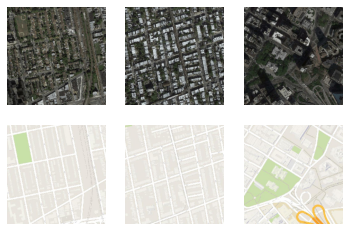

In [8]:
n_samples=3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1+i)
	plt.axis('off')
	plt.imshow(source_imgs[i].astype('uint8'))

for i in range(n_samples):
	plt.subplot(2, n_samples, 1+n_samples+i)
	plt.axis('off')
	plt.imshow(target_imags[i].astype('uint8'))
 
plt.show()

In [ ]:
image_shape=source_imgs.shape[1:]

In [ ]:
image_shape

(256, 256, 3)

In [ ]:
dis_model=discriminator(image_shape)
print(dis_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 256, 256, 6)  0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

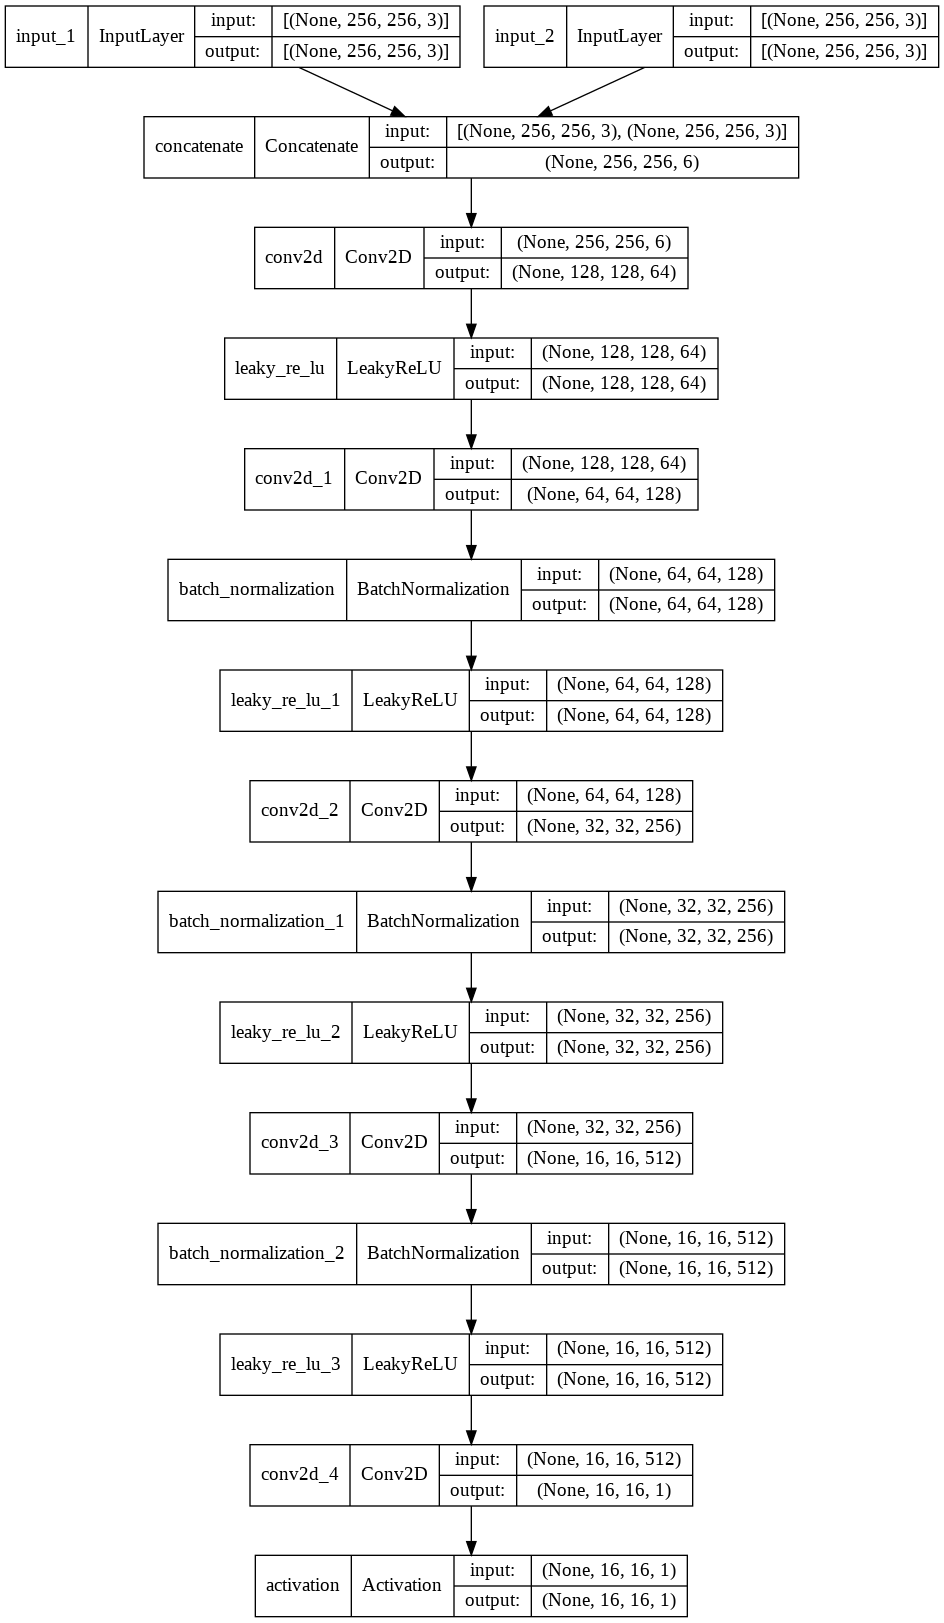

In [ ]:
plot_model(dis_model, to_file='/content/gdrive/MyDrive/GAN/Pix2Pix/discriminator_model.png', show_shapes=True)

In [ ]:
gen_model=generator(image_shape)
print(gen_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 128, 128, 64  3136        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_4 (LeakyReLU)      (None, 128, 128, 64  0           ['conv2d_5[0][0]']               
                                )                                                           

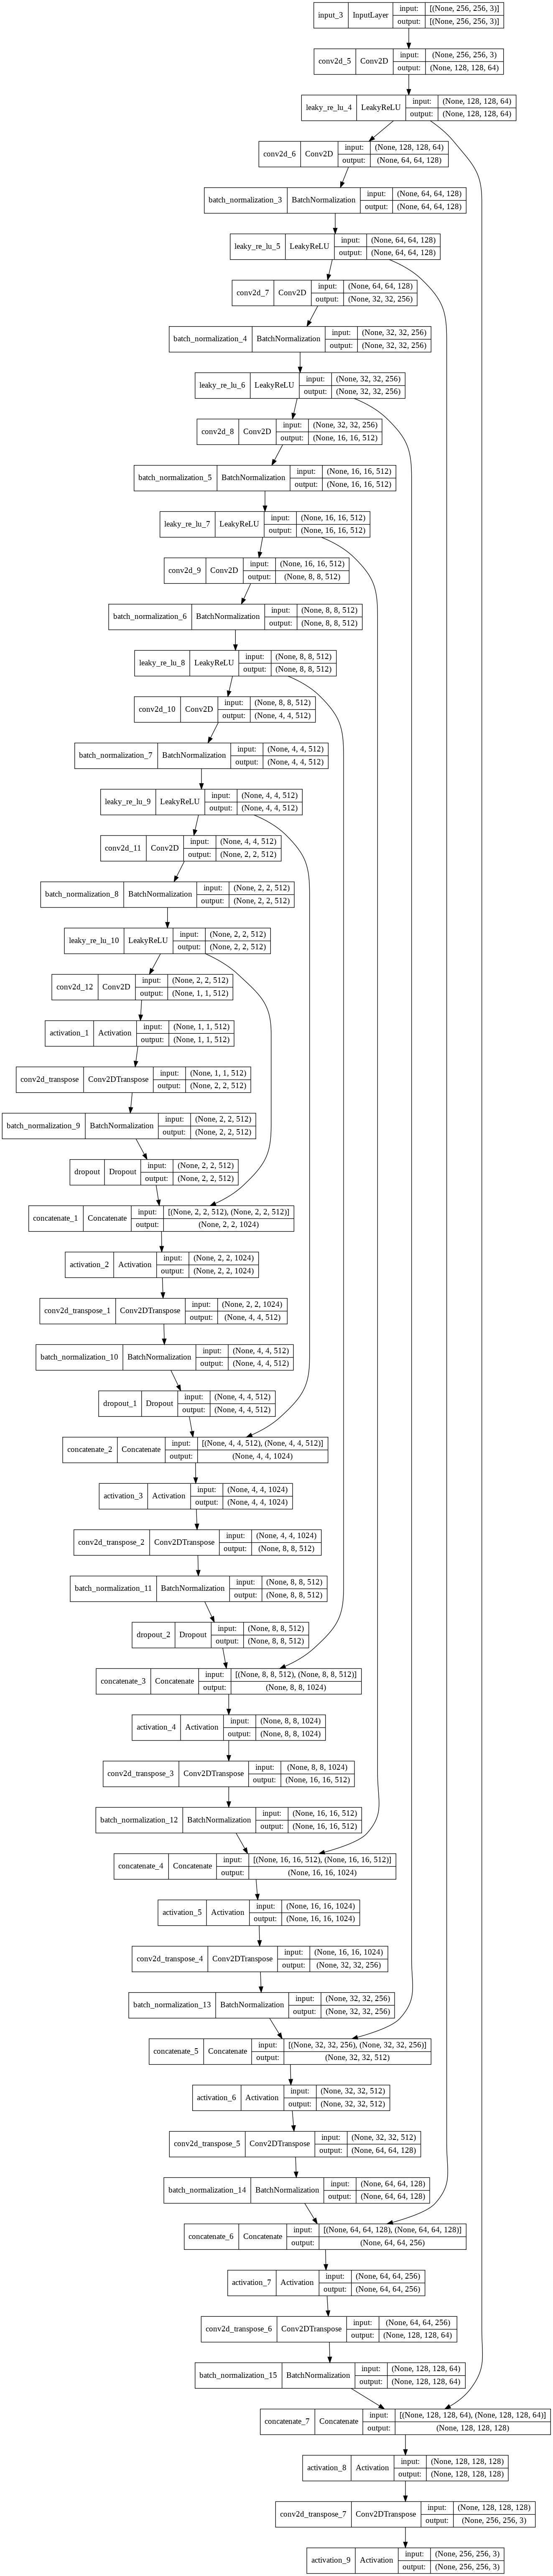

In [ ]:
plot_model(gen_model, to_file='/content/gdrive/MyDrive/GAN/Pix2Pix/generator_model.png', show_shapes=True)

In [ ]:
model=gan_model(gen_model, dis_model, image_shape)
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 256, 256, 3)  54429315    ['input_4[0][0]']                
                                                                                                  
 model (Functional)             (None, 16, 16, 1)    2771393     ['input_4[0][0]',                
                                                                  'model_1[0][0]']                
                                                                                            

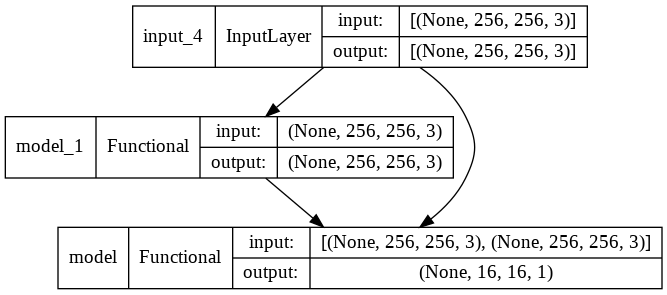

In [ ]:
plot_model(model, to_file='/content/gdrive/MyDrive/GAN/Pix2Pix/gan_model.png', show_shapes=True)

In [9]:
data=[source_imgs, target_imags]
def preprocess_data(data):
  X1, X2=data[0], data[1]
  X1=(X1-127.5) / 127.5
  X2=(X2-127.5) / 127.5
  return [X1, X2]

data=preprocess_data(data)

In [ ]:
%%time

train(gen=gen_model, dis=dis_model, gan=model, data=data, n_epochs=60, batch_size=1, save_path='/content/gdrive/MyDrive/GAN/Pix2Pix/gan_model.h5')

Streaming output truncated to the last 5000 lines.
>60760, d1[0.000] d2[0.000] g[9.867]
>60761, d1[0.000] d2[0.000] g[2.301]
>60762, d1[0.000] d2[0.000] g[6.496]
>60763, d1[0.000] d2[0.000] g[5.944]
>60764, d1[0.000] d2[0.000] g[4.284]
>60765, d1[0.000] d2[0.000] g[6.042]
>60766, d1[0.000] d2[0.000] g[6.656]
>60767, d1[0.000] d2[0.000] g[4.746]
>60768, d1[0.000] d2[0.000] g[5.576]
>60769, d1[0.000] d2[0.000] g[8.263]
>60770, d1[0.000] d2[0.000] g[3.126]
>60771, d1[0.000] d2[0.000] g[8.589]
>60772, d1[0.000] d2[0.000] g[6.690]
>60773, d1[0.000] d2[0.000] g[9.062]
>60774, d1[0.000] d2[0.000] g[2.313]
>60775, d1[0.000] d2[0.000] g[6.711]
>60776, d1[0.000] d2[0.000] g[9.489]
>60777, d1[0.000] d2[0.000] g[8.991]
>60778, d1[0.000] d2[0.000] g[6.727]
>60779, d1[0.000] d2[0.000] g[11.108]
>60780, d1[0.000] d2[0.000] g[8.765]
>60781, d1[0.000] d2[0.000] g[7.215]
>60782, d1[0.000] d2[0.000] g[6.664]
>60783, d1[0.000] d2[0.000] g[8.700]
>60784, d1[0.000] d2[0.000] g[7.193]
>60785, d1[0.000] d2[0.

>65760, d1[0.000] d2[0.000] g[8.720]
CPU times: user 2h 54min 59s, sys: 4min 45s, total: 2h 59min 44s
Wall time: 2h 59min 53s


In [10]:
from tensorflow.keras.models import load_model

In [11]:
model=load_model('/content/gdrive/MyDrive/GAN/Pix2Pix/gan_model.h5')

In [12]:
def plot_images(src_img, gen_img, tar_img):
  images=np.vstack((src_img, gen_img, tar_img))
  images=(images + 1) / 2.0
  titles=['Source', 'Generated', 'Expected']
  for i in range(len(images)):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1 + i)
    plt.axis('off')
    plt.imshow(images[i])
    plt.title(titles[i])
  plt.show()

In [13]:
[X1, X2]=data

In [14]:
ix=np.random.randint(0, len(X1), 1)

In [15]:
src_image, tar_image=X1[ix], X2[ix]

In [16]:
gen_image=model.predict(src_image)

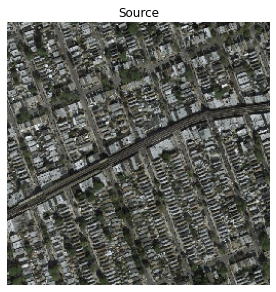

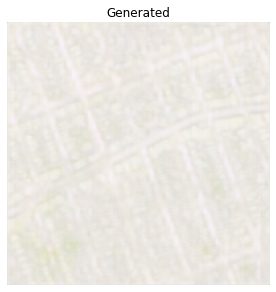

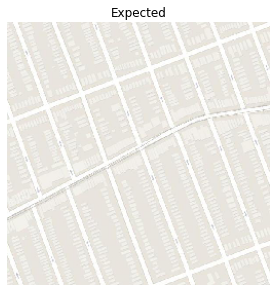

In [17]:
plot_images(src_image, gen_image, tar_image)